In [41]:
import pandas as pd
import numpy as np

In [102]:
a = pd.read_csv(r"C:\Users\Kerim Birgun\Desktop\R\Covid Study\cases_eu.csv")
a.head()

,Type,Europe,France,Germany,Italy,Spain,UK,Turkey
0,Case,21,1,0,14,1,4,1.0
1,Case,85,2,0,76,2,4,2.0
2,Case,146,4,2,129,6,4,2.0
3,Case,255,7,6,226,11,4,2.0
4,Case,412,28,32,319,24,7,18.0


In [199]:
case = a[a['Type'] == "Case"];
case2 = case.melt(id_vars =['Type'],var_name = "Countries",value_name="Case");case2.head()

,Type,Countries,Case
0,Case,Europe,21.0
1,Case,Europe,85.0
2,Case,Europe,146.0
3,Case,Europe,255.0
4,Case,Europe,412.0


In [200]:
death = a[a['Type'] == "Death"];
death2 = death.melt(id_vars =['Type'],var_name = "Countries2",value_name="Death");death2.head()

,Type,Countries2,Death
0,Death,Europe,2.0
1,Death,Europe,6.0
2,Death,Europe,11.0
3,Death,Europe,13.0
4,Death,Europe,18.0


In [201]:
data = pd.concat([case2,death2], axis=1)
data = data[["Countries","Case","Death"]];data.head(5)

,Countries,Case,Death
0,Europe,21.0,2.0
1,Europe,85.0,6.0
2,Europe,146.0,11.0
3,Europe,255.0,13.0
4,Europe,412.0,18.0


In [202]:
death2 = [] 
for x in data["Death"]:
    if x == 0:
        death2.append(0.1)
    else:
        death2.append(x)
data["Death"] = death2

case2 = [] 
for x in data["Case"]:
    if x == 0:
        case2.append(0.1)
    else:
        case2.append(x)
data["Case"] = case2

In [209]:
data.head(5)

,Countries,Case,Death
0,Europe,21.0,2.0
1,Europe,85.0,6.0
2,Europe,146.0,11.0
3,Europe,255.0,13.0
4,Europe,412.0,18.0


In [265]:
data2 = data.dropna()
data2 = data2.copy()
data2["Death"] = np.log(data2["Death"])
data2["Case"] = np.log(data2["Case"]);data2.head(5)

,Countries,Case,Death
0,Europe,3.044522,0.693147
1,Europe,4.442651,1.791759
2,Europe,4.983607,2.397895
3,Europe,5.541264,2.564949
4,Europe,6.021023,2.890372


In [229]:
data2[data2["Case"]< 0] = 0
data2[data2["Death"]< 0] = 0

In [242]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 360x360 with 0 Axes>

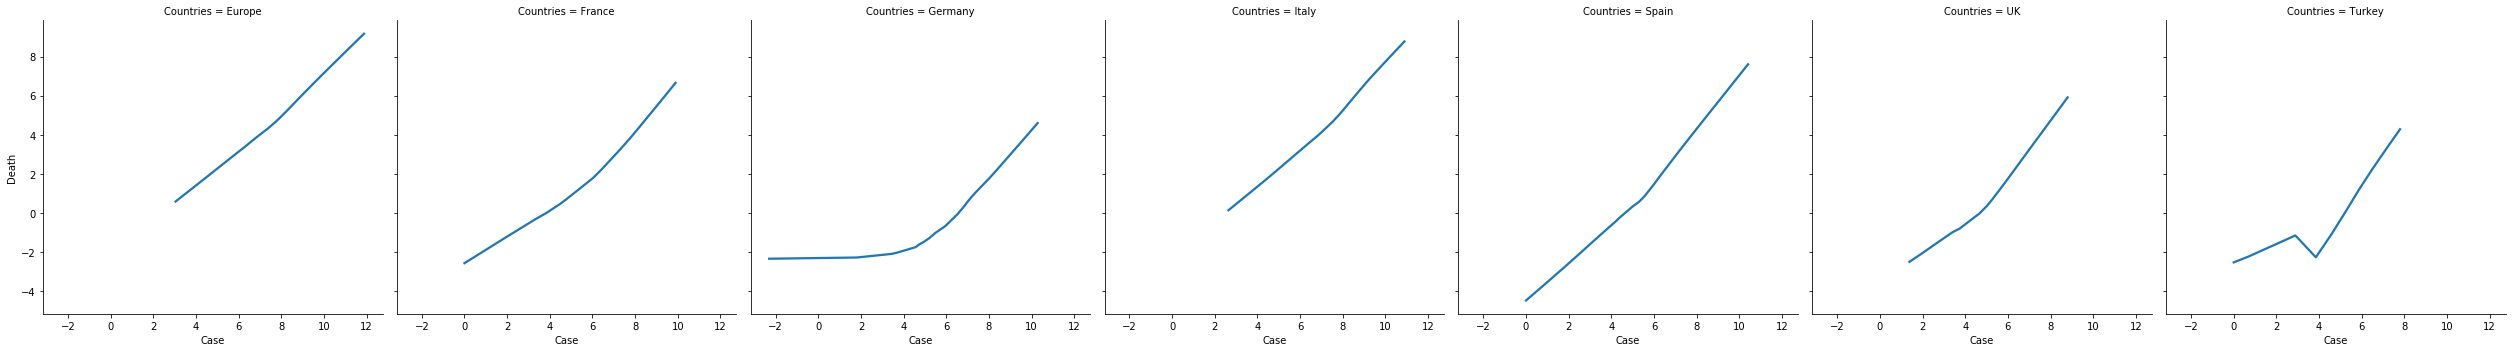

In [269]:
plt.figure(figsize=(5,5))
sns.lmplot(x="Case",y="Death",col ="Countries",scatter = False,ci=None,lowess=True,data=data2)